In [1]:
# path = 'C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice'

In [32]:
import pandas as pd
import numpy as np


In [55]:
import codecs
positive = []
negative = []
posneg = []
#print(path+"positive_words_self.txt")
# file_path1 = path+"/positive_words_self.txt"
#print(file_path)
pos = codecs.open('./positive_words_self.txt', 'rb', encoding='UTF-8') 
while True:
    line = pos.readline()
    line = line.replace('\n', '')
    line = line.replace('\r', '')
    positive.append(line)
    posneg.append(line)
    if not line: break 
pos.close()
# file_path2 = path+"/negative_words_self.txt"

neg = codecs.open('./negative_words_self.txt', 'rb', encoding='UTF-8')

while True:
    line = neg.readline()
    line = line.replace('\n', '')
    line = line.replace('\r', '')
    negative.append(line)
    posneg.append(line)
    if not line: break
neg.close()

In [148]:
posneg

['MOU',
 '제휴',
 '주목',
 '호응',
 '돌파',
 '이목',
 '수상',
 '입점',
 '인기',
 '열풍',
 '진화',
 '대박',
 '순항',
 '유치',
 '1위',
 '출시',
 '선보여',
 '오픈',
 '팝업',
 '돌풍',
 '팝업스토어',
 '인싸',
 '줄서서',
 '인기',
 '대세',
 '트렌드',
 '불티',
 '진출',
 '부상',
 '체결',
 '증가',
 '봉사',
 '기부',
 '신메뉴',
 '신제품',
 '신상',
 '최고',
 '새로운',
 '편한',
 '미소',
 '맛집',
 '착한가게',
 '캠패인',
 '순항',
 '착한',
 '제작지원',
 '확대',
 '증설',
 '결정',
 '급등',
 '증가',
 '강세',
 '상승',
 '출시',
 '인기',
 '공략',
 '성장',
 '클릭',
 '대상',
 '돌파',
 '최대',
 '인기',
 '개최',
 '강화',
 '개선',
 '잡다',
 '인수',
 '열풍',
 '박차',
 '알리다',
 '클래스',
 '대세',
 '오르다',
 '가다',
 '협력',
 '즐기다',
 '이벤트',
 '진출',
 '주목',
 '최초',
 '프리미엄',
 '맛있다',
 '나서다',
 '개발',
 '선봬',
 '증가',
 '상승',
 '트렌드',
 '대박',
 '한류',
 '우수',
 '늘다',
 '진화',
 '재건축',
 '띄다',
 '최대',
 '되다',
 '대상',
 '주목',
 '최고',
 '인기',
 '개발',
 '보증',
 '몰리다',
 '뜨다',
 '북적',
 '입찰',
 '선정',
 '열기',
 '관심',
 '크다',
 '진출',
 '특별',
 '잡다',
 '본격',
 '높다',
 '프리미엄',
 '흑자',
 '강화',
 '협력',
 '뜨겁다',
 '선두',
 '우승',
 '상승',
 '회복',
 '인수',
 '확대',
 '돌파',
 '강세',
 '강화',
 '도약',
 '진출',
 '안착',
 '탈환',
 '낙폭',
 '출시',
 '개최',
 '클릭',
 '최고

In [56]:
# postive와 negetive에 마지막ㅇ 들어있는 '' 사제
del posneg[188]

In [57]:
# # 위와 동일 순서(필)
del posneg[295]

In [58]:
# !ls -l ./drive/My\ Drive/Source/news_subject_classification/positive_words_self.txt


In [60]:
# !pip install konlpy

In [19]:
test_data = pd.read_csv("../article_df/SK하이닉스_df.csv")

stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy
from konlpy.tag import Okt

okt = Okt()
#test_data
X_test = []
test_data = test_data.dropna()

for sentence in test_data['Title']:
  #print(sentence)
  #break;
    if sentence is not None:
        temp_X = []
        # 토큰화
        temp_X = okt.morphs(sentence, stem=True) 
        # 불용어 제거
        temp_X = [word for word in temp_X if not word in stopwords] 
        X_test.append(temp_X)

words = []
for tokens in X_test:
    for token in tokens:  
        words.append(token)


#X_test

In [61]:
from collections import Counter

count = Counter(words)

tag_count = []
tags = []

for n, c in count.most_common(500):
    dics = {'tag': n, 'count': c}

    if len(dics['tag']) >= 2 and len(tags) <= 250:
        tag_count.append(dics)
        tags.append(dics['tag'])
    
for tag in tag_count:
    print(" {:<14}".format(tag['tag']), end='\t')
    print("{}".format(tag['count']))

 코스피           	2792
 SK            	2458
 하이닉스          	2065
 반도체           	1124
 삼성            	770
 외국인           	746
 기관            	745
 상승            	636
 전자            	602
 하락            	557
 코스닥           	425
 실적            	414
 외인            	397
 마감            	396
 특징            	387
 투자            	373
 회복            	371
 종목            	361
 팔자            	361
 매수            	360
 매도            	357
 증시            	340
 보합            	337
 컨콜            	322
 만에            	314
 기업            	283
 '…            	274
 도시바           	270
 개인            	263
 종합            	262
 영업            	262
 공급            	256
 ...           	253
 규모            	251
 사자            	249
 계약            	237
 ]"            	221
 연속            	217
 클릭            	215
 대다            	209
 출발            	203
 장비            	201
 낸드            	191
 초반            	189
 …"            	187
 전망            	186
 동반            	184
 반등            	180
 최태원           	178
 최대            	

In [62]:
sk_hy=pd.read_csv('../article_df/SK하이닉스_df.csv')

In [63]:
h_movis=pd.read_csv('../article_df/현대모비스_df.csv')

In [64]:
kia_car=pd.read_csv('../article_df/기아차_df.csv')

In [65]:
skhy_titles=sk_hy['Title']

In [66]:
h_titles=h_movis['Title']

In [67]:
kia_titles=kia_car['Title']

In [68]:
kia_titles

0                  與 영남주자들 “신종 코로나 추경 검토해야”
1            전기차-충전기 제조사와 함께하는 '상호운용성 테스티벌'
2           "정부, 저공해차 안 만드는 대기업에 패널티 강화 추진"
3         '시스템반도체 팹리스' 후속조치 본격화…현장과 소통행보 시작
4             외국인, 보름간 韓 주식 2.4兆 매수…반도체가 절반
                       ...                 
9018               KIA, 13일 ‘타이거즈 러브투게더 데이’
9019                           애리조나의 잠못드는 밤
9020      96.6점 받은 '올해의 안전한 차'는?…내 차는 몇 번째?
9021    KIA 타이거즈, 13일 ‘제3회 타이거즈 러브펀드 데이’ 개최
9022           기아차, 아시안게임 야구 준결승·결승전 응원단 모집
Name: Title, Length: 9023, dtype: object

In [73]:
skhy_titles=skhy_titles.dropna()
h_titles=h_titles.dropna()
kia_titles=kia_titles.dropna()

In [15]:
sk_title.to_csv('./sk_title.csv')


In [75]:
negative

['갑질',
 '논란',
 '폭리',
 '허위',
 '과징금',
 '눈물',
 '피해',
 '포화',
 '우롱',
 '위반',
 '리스크',
 '사퇴',
 '급락',
 '하락',
 '폐업',
 '불만',
 '산재',
 '닫아',
 '손배소',
 '구설수',
 '폐점',
 '적발',
 '침해',
 '빨간불',
 '취약',
 '불명예',
 '분신',
 '구형',
 '기소',
 '반토막',
 '호소',
 '불매',
 '냉담',
 '문제',
 '직격탄',
 '한숨',
 '불똥',
 '항의',
 '묵묵부담',
 '싸늘',
 '일탈',
 '파문',
 '게이트',
 '횡령',
 '사과문',
 '여파',
 '울상',
 '초토화',
 '급감',
 '우려',
 '중단',
 '퇴출',
 '해지',
 '일베',
 '이물질',
 '벌레',
 '엉망',
 '적발',
 '위생불량',
 '위생엉망',
 '소송',
 '하락',
 '매출하락',
 '반토막',
 '혐의',
 '불매',
 '부채',
 '적발',
 '폭리',
 '과징금',
 '오너리스크',
 '매각',
 '포기',
 '불만',
 '피해',
 '사고',
 '배타',
 '인상',
 '손해',
 '불황',
 '하락',
 '적자',
 '후퇴',
 '우려',
 '매각',
 '리스크',
 '비리',
 '약세',
 '사태',
 '의혹',
 '악재',
 '불확실',
 '부진',
 '여파',
 '급락',
 '붕괴',
 '하락',
 '부진',
 '위기',
 '조작',
 '여파',
 '약세',
 '밉다',
 '후퇴',
 '낙폭',
 '밉다',
 '리스크',
 '']

In [60]:
skhy_titles

0             올해 반도체 수출 3년 만에 최저, 수출 비중 17%로 하락
1                개미는 올해도 슬프다…순매수 톱10, 상승 종목 '0'
2                개미는 올해도 슬프다…순매수 톱10, 상승 종목 '0'
3                한라, 용인역삼 지역주택조합 공사 수주…2109억 규모
4              올해 증시 폐장일 코스피 2200선 혼조...코스닥 강보합
                         ...                   
8425           코스피 1.2% 약세, 1940선 등락…삼성電 128.9만
8426    "환율·실적·中 우려" 새해 첫날 코스피 2% 급락…1960선 '털썩'
8427                      엔底에도 달린 현대차 3인방, 올해는?
8428       "새해, 하행선 급행 電·車?"…코스피 장 중 1960선 '털썩'
8429                    SKT "자승자강 의지로 경쟁서 이길 것"
Name: Title, Length: 8430, dtype: object

In [77]:
import requests
import re
import pandas as pd

In [78]:

# label = []

# my_title_dic = {"title":[], "label":label}

# j=0
# for title in skhy_titles:
#     my_title_dic['title'].append(title)
#     for i in range(len(posneg)):
#         posflag = False 
#         negflag = False 
#         if i < (len(positive)-1): 
#             # print(title_data.find(posneg[i])) 
#             if title.find(posneg[i]) != -1:
#                 posflag = True
#                 print(i, "positive?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
#                 break
#         if i > (len(positive)-2): 
#             if title.find(posneg[i]) != -1: 
#                 negflag = True 
#                 print(i, "negative?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
#                 break
#     if posflag == True:
#         label.append(1)
#         # print("positive", j) 
#     elif negflag == True:
#         label.append(-1)
#     #print("negative", j) 
#     elif negflag == False and posflag == False:
#         label.append(0)
#         # print("objective", j) 
#     j+=1
# my_title_dic['label'] = label 
# my_title_df = pd.DataFrame(my_title_dic)

178 positive? 테스트 :  19 비교단어 :  선도 인덱스 :  178 최태원 SK 회장 "소부장 글로벌 선도 위해 인프라 공유할 것”
74 positive? 테스트 :  14 비교단어 :  협력 인덱스 :  74 소부장 2.0은 '연대와 협력'…文대통령 "일본과 다른 길 간다"(상보)
191 negative? 테스트 :  24 비교단어 :  허위 인덱스 :  191 김학용, 민주당 이규민 후보 선관위 고발…"허위사실 반복게재"
269 negative? 테스트 :  5 비교단어 :  적자 인덱스 :  269 대일 무역적자 16년 만에 최저치 전망…제 발등 찍은 일본
62 positive? 테스트 :  16 비교단어 :  개최 인덱스 :  62 '제9회 산업기술보호의 날' 개최…보안담당자 500명 참석
280 negative? 테스트 :  20 비교단어 :  부진 인덱스 :  280 몸값 떨어진 '메모리' 탓에 반도체 부진…"생산·물량은 늘었다"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 "내년 반도체 살아난다"…글로벌 기관, 최대 10.2%↑ 전망
197 negative? 테스트 :  27 비교단어 :  위반 인덱스 :  197 성윤모 장관 "韓 화이트리스트 제외, 日 국제법 위반 철회해야"
4 positive? 테스트 :  21 비교단어 :  돌파 인덱스 :  4 [시론] 일본 경제보복, 규제 혁파로 돌파해야
237 negative? 테스트 :  27 비교단어 :  우려 인덱스 :  237 日언론 "수출 규제가 韓 의식 바꿨다"…脫일본화 우려↑
56 positive? 테스트 :  12 비교단어 :  성장 인덱스 :  56 산업硏, 2019 경제성장률 2.4%로 낮춰…'수출·투자·소비' 모두 둔화
14 positive? 테스트 :  30 비교단어 :  1위 인덱스 :  14 문 대통령 "2030년까지 시스템반도체 파운드리 세계 1위…종합반도체 강국 도약"
74 positive? 테스트 :  21 비교단어 :  협력

63 positive? 테스트 :  34 비교단어 :  강화 인덱스 :  63 산업계,"포항지진 피해 극히 미미…여진 대비 실시간 모니터링 강화"(종합)
194 negative? 테스트 :  8 비교단어 :  피해 인덱스 :  194 전자업계 "지진피해 없다…한때 일부 가동멈춰"(종합)
194 negative? 테스트 :  28 비교단어 :  피해 인덱스 :  194 삼성電·SK하이닉스, "반도체 공장 정상작동중…지진피해 없다"
14 positive? 테스트 :  31 비교단어 :  1위 인덱스 :  14 3Q 수출 전년比 18.5% 증가…연간 3Q 누계 역대 1위
83 positive? 테스트 :  27 비교단어 :  개발 인덱스 :  83 SK하이닉스, CEO 직속 테크혁신센터 마련…공정개발 집중
56 positive? 테스트 :  22 비교단어 :  성장 인덱스 :  56 SK하이닉스, 61개 협력사 초청 '동반성장데이' 개최
2 positive? 테스트 :  40 비교단어 :  주목 인덱스 :  2 [트럼프 청구서]앞뒤 안맞는 무역불균형 논리…산업계 "對美투자·고용확대 주목해야"(종합)
144 positive? 테스트 :  1 비교단어 :  특허 인덱스 :  144 [특허괴물의 역습] 삼성에 ITC 제소한 테세라, 8대 특허괴물 중 하나
62 positive? 테스트 :  28 비교단어 :  개최 인덱스 :  62 산업부, '제18차 세계반도체생산국 민관합동회의' 개최
114 positive? 테스트 :  32 비교단어 :  본격 인덱스 :  114 [SK하이닉스 컨콜]"내년 1분기에 서버향 1x나노 D램 본격 양산"
15 positive? 테스트 :  35 비교단어 :  출시 인덱스 :  15 [SK하이닉스 컨콜]"72단 엔터프라이즈SSD, 내년부터 샘플 출시"
114 positive? 테스트 :  23 비교단어 :  본격 인덱스 :  114 [SK하이닉스 컨콜]"4분기 72단 낸드 본격 양산 시작"
30 positive? 테스트 :  18 비교단어 

56 positive? 테스트 :  13 비교단어 :  성장 인덱스 :  56 스마트폰·PC 출하량 역성장…믿었던 반도체마저 꺾이나
46 positive? 테스트 :  35 비교단어 :  확대 인덱스 :  46 SK하이닉스, '패키지와 테스트' 책 출간…'반도체 지식 공유 확대'
267 negative? 테스트 :  0 비교단어 :  불황 인덱스 :  267 불황에도‥지주사들, 수천억 로열티 수확
13 positive? 테스트 :  18 비교단어 :  유치 인덱스 :  13 코로나 발 묶인 지자체 해외 투자유치 '취소 도미노'…獨하노버메세 7월 연기
236 negative? 테스트 :  9 비교단어 :  급감 인덱스 :  236 삼성전자 법인세 급감…정부 세수 악화 우려
286 negative? 테스트 :  15 비교단어 :  위기 인덱스 :  286 韓산업계 '도미노 셧다운' 위기감 고조…LG 인천 연구동 폐쇄(종합)
14 positive? 테스트 :  18 비교단어 :  1위 인덱스 :  14 삼성전자, 웨이퍼 생산능력 세계 1위…SK하이닉스 4위
238 negative? 테스트 :  9 비교단어 :  중단 인덱스 :  238 '코로나19'에 중단된 국내기업 중국공장 대부분 재가동
63 positive? 테스트 :  23 비교단어 :  강화 인덱스 :  63 한경연 "주식 대량보유 신고제도 3%룰로 강화해야"
286 negative? 테스트 :  12 비교단어 :  위기 인덱스 :  286 최태원의 '퀀텀점프'‥위기에 '미래퍼즐' 완성된다
32 positive? 테스트 :  22 비교단어 :  기부 인덱스 :  32 SK하이닉스, '행복나눔기금' 29억원 기부…10년간 총 224억원
60 positive? 테스트 :  0 비교단어 :  최대 인덱스 :  60 최대 매출에도 급감한 영업익…SKT "하반기 이동통신 턴어라운드"(종합2보)
176 positive? 테스트 :  26 비교단어 :  합병 인덱스 :  176 [컨콜]SKT "'4월 출범' SKB-티브

160 positive? 테스트 :  27 비교단어 :  이익 인덱스 :  160 한경연 "코스피 상장사 10개 중 6개 올해 영업이익 줄었다"
46 positive? 테스트 :  40 비교단어 :  확대 인덱스 :  46 SK하이닉스, 치매노인·발달장애인 실시간 위치 파악 '행복GPS' 보급 확대
36 positive? 테스트 :  26 비교단어 :  최고 인덱스 :  36 이석희 SK하이닉스 신임 대표 "기술 혁신으로 최고 반열 올라설 것"
35 positive? 테스트 :  14 비교단어 :  신상 인덱스 :  35 4대그룹 인사 관통하는 '신상필벌'의 원칙
6 positive? 테스트 :  33 비교단어 :  수상 인덱스 :  6 삼성전자 사상 첫 900억달러 수출 탑 '쾌거'…무역의 날 수상
201 negative? 테스트 :  9 비교단어 :  하락 인덱스 :  201 내년 D램 가격 하락 전망...SK하이닉스 영업익 예상치 ↓
74 positive? 테스트 :  31 비교단어 :  협력 인덱스 :  74 최태원 회장, 美 워싱턴D.C.서 세일즈 나서…"韓-美 협력모델 구축해 나가야"
56 positive? 테스트 :  14 비교단어 :  성장 인덱스 :  56 메모리 반도체 , 내년 역성장 전망...'빨간불' 켜진 한국경제
63 positive? 테스트 :  16 비교단어 :  강화 인덱스 :  63 SK하이닉스, 파운드리 사업 강화...中법인에 1000만달러 출자
30 positive? 테스트 :  37 비교단어 :  증가 인덱스 :  30 전자업계 고용도 실적따라..."삼성전자 1년만에 임직원 3000명 증가"
60 positive? 테스트 :  13 비교단어 :  최대 인덱스 :  60 D램 반도체 매출 역대 최대…삼성·SK하이닉스 세계 점유율 75%
79 positive? 테스트 :  11 비교단어 :  최초 인덱스 :  79 SK하이닉스, 세계 최초 국제규격 맞춘 차세대 D램 개발..."2020년 양산"
14 positive? 테스트 : 

66 positive? 테스트 :  23 비교단어 :  인수 인덱스 :  66 "한·미·일 연합에 애플도 합류"…도시바 인수전 새 변수되나
221 negative? 테스트 :  20 비교단어 :  문제 인덱스 :  221 SK하이닉스, 경찰청과 치매노인 실종문제 해결 나섰다
248 negative? 테스트 :  8 비교단어 :  소송 인덱스 :  248 SK-美 베인 소송 검토,  도시바 메모리 매각 파국 치닫나
36 positive? 테스트 :  8 비교단어 :  최고 인덱스 :  36 반도체 시장 '최고 기록' 행진…삼성, 2위와 격차 더 벌렸다
259 negative? 테스트 :  17 비교단어 :  매각 인덱스 :  259 도시바, 미·일 연합에 반도체 매각 가능성↑…SK하이닉스 어쩌나
15 positive? 테스트 :  36 비교단어 :  출시 인덱스 :  15 '아이폰8'선 용량 걱정 없다…"64GB·256GB·512GB로 출시"
259 negative? 테스트 :  14 비교단어 :  매각 인덱스 :  259 日언론,"도시바, 반도체 매각우선협상자 WD진영 변경"…공식통보는 확인안돼
124 positive? 테스트 :  24 비교단어 :  회복 인덱스 :  124 삼성전자, 모바일D램 시장 점유율 60%대 회복…"독주 체제 가속"
66 positive? 테스트 :  22 비교단어 :  인수 인덱스 :  66 도시바, 결국 WD와 손잡나…한미일연합 인수 '빨간불'
52 positive? 테스트 :  19 비교단어 :  상승 인덱스 :  52 삼성전자, D램·낸드 점유율 동시 상승
259 negative? 테스트 :  23 비교단어 :  매각 인덱스 :  259 '상장폐지' 급한 불 끈 도시바, 메모리 매각 향배는?
56 positive? 테스트 :  5 비교단어 :  성장 인덱스 :  56 [韓경제 성장축 5대그룹 위기]위기의 삼성, 오너 부재 엎친데 中 저가공습 덮쳤다
56 positive? 테스트 :  5 비교단어 :  성장 인덱스 :  56 [

52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 "4분기 낸드플래시 가격 최대 15% 상승"
142 positive? 테스트 :  35 비교단어 :  혁신 인덱스 :  142 [재계 2017년 사업 계획]SK, 'CEO 세미나' 기점으로 혁신 예고
36 positive? 테스트 :  30 비교단어 :  최고 인덱스 :  36 최태원 SK회장, 中충칭 당서기 면담…"경제협력 위해 최고급 네트워크 구축"
58 positive? 테스트 :  12 비교단어 :  대상 인덱스 :  58 SK하이닉스 학술대회 대상에 佛출신 아드리앙 오제 선임
30 positive? 테스트 :  24 비교단어 :  증가 인덱스 :  30 아이폰7 제조원가 26만원…전작보다 22% 증가
194 negative? 테스트 :  17 비교단어 :  피해 인덱스 :  194 [경주 지진]대기업 생산공장 "피해여부 파악, 일제히 시설점검"(종합)
221 negative? 테스트 :  22 비교단어 :  문제 인덱스 :  221 유엔인권보고서 "삼성전자 반도체 백혈병 문제해결 노력 인정"
198 negative? 테스트 :  19 비교단어 :  리스크 인덱스 :  198 [하이닉스-현대차 시총 역전]노조 리스크와 상생으로 엇갈린 결과
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 "4분기 낸드플래시 가격 최대 15% 상승"
142 positive? 테스트 :  35 비교단어 :  혁신 인덱스 :  142 [재계 2017년 사업 계획]SK, 'CEO 세미나' 기점으로 혁신 예고
36 positive? 테스트 :  30 비교단어 :  최고 인덱스 :  36 최태원 SK회장, 中충칭 당서기 면담…"경제협력 위해 최고급 네트워크 구축"
58 positive? 테스트 :  12 비교단어 :  대상 인덱스 :  58 SK하이닉스 학술대회 대상에 佛출신 아드리앙 오제 선임
30 positive? 테스트 :  24 비교단어 :  증가 인덱스 :  30 

56 positive? 테스트 :  20 비교단어 :  성장 인덱스 :  56 내년 D램시장 매출 올해보다 14% 성장
46 positive? 테스트 :  24 비교단어 :  확대 인덱스 :  46 도시바, 하이닉스 소송 취하…기술개발 협력 확대(상보)
248 negative? 테스트 :  12 비교단어 :  소송 인덱스 :  248 SK하이닉스, 도시바 소송취하 합의
165 positive? 테스트 :  6 비교단어 :  나눔 인덱스 :  165 SK, 행복나눔 성금 120억원 기탁
30 positive? 테스트 :  29 비교단어 :  증가 인덱스 :  30 10대그룹 사내유보금, 과세방침에도 6개월새 29조 증가
4 positive? 테스트 :  31 비교단어 :  돌파 인덱스 :  4 SK그룹 'ICT' 수장 젊은 피로 교체…글로벌로 위기 돌파 '승부수'(종합)
142 positive? 테스트 :  21 비교단어 :  혁신 인덱스 :  142 SK, 2015년 임원 인사 "리더십 혁신으로 위기극복"
56 positive? 테스트 :  14 비교단어 :  성장 인덱스 :  56 내년도 D램 시장 16% 성장, 전자업계 ‘호재‘
56 positive? 테스트 :  26 비교단어 :  성장 인덱스 :  56 반도체 내년에도 효자…D램 16%·낸드 12% 성장
142 positive? 테스트 :  26 비교단어 :  혁신 인덱스 :  142 내년 IT산업 애플 '워치'·구글 '아라폰'이 혁신 주도
6 positive? 테스트 :  23 비교단어 :  수상 인덱스 :  6 허진수 부회장·한상범 사장, 금탑산업훈장 수상
62 positive? 테스트 :  15 비교단어 :  개최 인덱스 :  62 제 51회 무역의날 기념식 개최
63 positive? 테스트 :  17 비교단어 :  강화 인덱스 :  63 전경련 "사전예방 뇌물방지절차 강화해야"
63 positive? 테스트 :  18 비교단어 :  강화 인덱스 :  63 SK하이닉스, 여성과학인재 육성 강화
6

60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 ‘코로나19’美FDA 임상3상 결과발표 최대 수혜株!
263 negative? 테스트 :  22 비교단어 :  사고 인덱스 :  263 외국인, 11주 연속 순매도 지속…삼바 사고 현대차 팔고
201 negative? 테스트 :  9 비교단어 :  하락 인덱스 :  201 코스피 장 초반 하락세…1900대 '흔들'
124 positive? 테스트 :  10 비교단어 :  회복 인덱스 :  124 코스피 1910선 회복하며 마감…기관 1000억원 순매수
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 코스피 1900선 회복…코스닥도 소폭 상승
170 positive? 테스트 :  12 비교단어 :  성공 인덱스 :  170 코스피 장 막판 반등 성공...1900선 눈앞
201 negative? 테스트 :  3 비교단어 :  하락 인덱스 :  201 원유 하락에 北 김정은 중태 소식까지 겹쳐 코스피 1% 하락마감
2 positive? 테스트 :  34 비교단어 :  주목 인덱스 :  2 【전문가추천】 독보적 기술력 완성 '반도체 관련주' 이 종목 주목하라
200 negative? 테스트 :  20 비교단어 :  급락 인덱스 :  200 김정은 중태설에 장중 코스피 2%대 급락
155 positive? 테스트 :  16 비교단어 :  출발 인덱스 :  155 원유시장 붕괴에 코스피 하락 출발…1870선까지 떨어져
155 positive? 테스트 :  10 비교단어 :  출발 인덱스 :  155 코스피 소폭 하락 출발…1900선은 유지
124 positive? 테스트 :  10 비교단어 :  회복 인덱스 :  124 코스피 1910선 회복…외국인 31거래일 만에 '순매수'
52 positive? 테스트 :  35 비교단어 :  상승 인덱스 :  52 코스피, 외인 30일 연속 순매도에 약보합 마감… 코스닥 2% 상승
60 positive? 테스트 :  26 비

52 positive? 테스트 :  20 비교단어 :  상승 인덱스 :  52 코스피, 기관 8000억 받쳐 1% 상승 마감…'2160' 안착
4 positive? 테스트 :  31 비교단어 :  돌파 인덱스 :  4 코스피, 기관 6000억 받치자 1% 상승…'2160' 돌파
30 positive? 테스트 :  19 비교단어 :  증가 인덱스 :  30 [공시+]메카로, 주력 제품 생산 증가로 수익 향상 기대
63 positive? 테스트 :  23 비교단어 :  강화 인덱스 :  63 [벽에 막힌 한국증시]"규제보다 내부통제 강화…스스로 해결 도와야"
52 positive? 테스트 :  4 비교단어 :  상승 인덱스 :  52 코스피 상승개장에 2120선 후반 지켜…코스닥도 오름세
212 negative? 테스트 :  18 비교단어 :  취약 인덱스 :  212 [벽에 막힌 한국증시]대외변수에 취약, 대장주 부진…기초체력 바닥난 韓증시
46 positive? 테스트 :  19 비교단어 :  확대 인덱스 :  46 코스피, 미·중 무역협상 불확실성 확대…개인 매수로 2140선 상승 마감
279 negative? 테스트 :  14 비교단어 :  불확실 인덱스 :  279 코스피, 미·중 무역협상 불확실성 속 등락…2120선 턱걸이
201 negative? 테스트 :  24 비교단어 :  하락 인덱스 :  201 韓증시, 코스피 2120·코스닥 660대로 하락마감
52 positive? 테스트 :  18 비교단어 :  상승 인덱스 :  52 美中 안갯속…코스피 혼조·코스닥 상승출발
263 negative? 테스트 :  20 비교단어 :  사고 인덱스 :  263 외국인, 3주 연속 '사자'…코스피 사고 코스닥 팔고
52 positive? 테스트 :  11 비교단어 :  상승 인덱스 :  52 코스피, 6일 연속 상승세 마감 2130선 후퇴… 코스닥 3일 연속↓
52 positive? 테스트 :  4 비교단어 :  상승 인덱스 :  52 코스피 상승하며 2140선

52 positive? 테스트 :  0 비교단어 :  상승 인덱스 :  52 상승폭 넓혀가는 코스피…2060선 '회복'
56 positive? 테스트 :  29 비교단어 :  성장 인덱스 :  56 [클릭 e종목]“SK텔레콤, 5G와 비통신 사업으로 성장기 진입할 것”
263 negative? 테스트 :  20 비교단어 :  사고 인덱스 :  263 외국인, 4주 연속 '팔자'…바이오 사고 반도체 팔고
49 positive? 테스트 :  27 비교단어 :  급등 인덱스 :  49 코스피, 외국인 저가 매수에 이틀째 상승…바이오 급등에 코스닥 반등
275 negative? 테스트 :  22 비교단어 :  약세 인덱스 :  275 코스피, 기관 매도에 2030선 초반서 약세
124 positive? 테스트 :  23 비교단어 :  회복 인덱스 :  124 코스피, 외국인·기관 순매수에 2030선 회복…코스닥은 하락
201 negative? 테스트 :  23 비교단어 :  하락 인덱스 :  201 자고 일어나면 신저가, 이달에만 331개 하락
275 negative? 테스트 :  0 비교단어 :  약세 인덱스 :  275 약세장 속 큰손들 담은 종목 보니
172 positive? 테스트 :  24 비교단어 :  효과 인덱스 :  172 SK하이닉스, 화웨이 폭풍에 연초 '외국인 효과' 폭삭
201 negative? 테스트 :  8 비교단어 :  하락 인덱스 :  201 코스피, 1% 하락…외국인 초반부터 매도폭탄
201 negative? 테스트 :  21 비교단어 :  하락 인덱스 :  201 코스피, 외국인 매도 지속…하루 만에 하락
74 positive? 테스트 :  14 비교단어 :  협력 인덱스 :  74 아이에이, 中염성시와 사업협력…"비메모리 반도체, 美·中 무역분쟁 반사이익 기대"
52 positive? 테스트 :  29 비교단어 :  상승 인덱스 :  52 코스피, 외인 자금 대량 이탈에도 기관 매수로 소폭 상승… 코스닥 700선 회복 마감
51 po

52 positive? 테스트 :  12 비교단어 :  상승 인덱스 :  52 '화웨이 악재' 없다…상승폭 키우는 코스피
200 negative? 테스트 :  18 비교단어 :  급락 인덱스 :  200 코스닥, 외인·기관 팔자에 2% 급락…전 업종 '파란불'
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭e종목]"SK하이닉스, 내년 상반기까지 실적 부진…목표가↓"
200 negative? 테스트 :  4 비교단어 :  급락 인덱스 :  200 미국발 급락 여파…코스피 2101에 마감, 코스닥 1%대 하락해 700선 턱걸이
278 negative? 테스트 :  4 비교단어 :  악재 인덱스 :  278 미국발 악재에 반등 무색해진 코스피…장중 2080대까지 내려
270 negative? 테스트 :  19 비교단어 :  후퇴 인덱스 :  270 코스피, 반등 하루만에 2110선 후퇴…코스닥 0.1%↓
270 negative? 테스트 :  21 비교단어 :  후퇴 인덱스 :  270 코스피, 외인·기관 매도에 2110선 후퇴…코스닥 0.1%↓
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]SK하이닉스, 내년 디램 가격 25% 하락…이익 추정치 축소 불가피"
52 positive? 테스트 :  25 비교단어 :  상승 인덱스 :  52 20일만에 돌아온 외국인…코스피, 2110선 상승 마감
201 negative? 테스트 :  3 비교단어 :  하락 인덱스 :  201 점점 하락하는 상장사 실적 전망치
51 positive? 테스트 :  26 비교단어 :  강세 인덱스 :  51 [특징주]삼성전자·SK하이닉스 외국인 매수에 '강세'
124 positive? 테스트 :  20 비교단어 :  회복 인덱스 :  124 외인·기관 쌍끌이…코스피 2100선 회복
124 positive? 테스트 :  5 비교단어 :  회복 인덱스 :  124 투자심리 회복(?), 급감했던 '빚 내 투자' 다시 늘

52 positive? 테스트 :  27 비교단어 :  상승 인덱스 :  52 미·중 무역협상 재개 기대감…코스피·코스닥 동반 상승
52 positive? 테스트 :  32 비교단어 :  상승 인덱스 :  52 미·중 무역협상 재개 기대감…코스피·코스닥 장 초반 동반 상승
164 positive? 테스트 :  11 비교단어 :  기대 인덱스 :  164 3차 남북정상회담에 기대 거는 증시
200 negative? 테스트 :  20 비교단어 :  급락 인덱스 :  200 코스피, 터키發 우려 지속 1.3% 급락
30 positive? 테스트 :  34 비교단어 :  증가 인덱스 :  30 30대 그룹 상반기 투자 45조6950억…지난해 보다 24% 증가
52 positive? 테스트 :  19 비교단어 :  상승 인덱스 :  52 코스피, 개인과 기관 매수에 소폭 상승하며 출발… 2250선 회복
198 negative? 테스트 :  2 비교단어 :  리스크 인덱스 :  198 터키리스크에 美골드만 바이오강타…코스피, 文정부 출범후 최저치 2248.45
198 negative? 테스트 :  6 비교단어 :  리스크 인덱스 :  198 터키·바이오리스크에 코스피 연중최저치·코스닥 3%↓
237 negative? 테스트 :  10 비교단어 :  우려 인덱스 :  237 코스피, 터키통화 우려로 1% 빠지고 2250대로
237 negative? 테스트 :  13 비교단어 :  우려 인덱스 :  237 코스피, 터키 외환위기 우려에 2270선 내줘…남북경협주는 ↑
160 positive? 테스트 :  18 비교단어 :  이익 인덱스 :  160 "반도체 패러다임 변화中…견조한 이익"
49 positive? 테스트 :  15 비교단어 :  급등 인덱스 :  49 코스피, 반도체 충격·환율 급등에 0.9% 하락
56 positive? 테스트 :  25 비교단어 :  성장 인덱스 :  56 에이피티씨 "글로벌 반도체 장비 전문기업으로 성장"
275 negative? 테스트 :

158 positive? 테스트 :  28 비교단어 :  동반 인덱스 :  158 코스피 장 초반 보합권 등락…삼성전자·SK하이닉스 동반↓
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]"SK하이닉스, 사상 최대 실적 예견…목표주가 상향조정"
133 positive? 테스트 :  13 비교단어 :  탈환 인덱스 :  133 IT株, 코스피 고점 재탈환 선봉장
51 positive? 테스트 :  17 비교단어 :  강세 인덱스 :  51 [특징주]삼성전자·SK하이닉스 강세…"반도체 호황 지속 전망"
52 positive? 테스트 :  13 비교단어 :  상승 인덱스 :  52 코스피, 사흘째 1%대 상승마감…2500선 '눈앞'
51 positive? 테스트 :  9 비교단어 :  강세 인덱스 :  51 코스피, 3일째 강세…장 초반 2480선 회복
51 positive? 테스트 :  22 비교단어 :  강세 인덱스 :  51 [특징주]삼성전자·SK하이닉스 나란히 '강세'
52 positive? 테스트 :  22 비교단어 :  상승 인덱스 :  52 코스피, 첫 북미정상회담 성사 기대감에 상승마감
164 positive? 테스트 :  8 비교단어 :  기대 인덱스 :  164 북미 정상회담 기대감에 증시 훈풍
49 positive? 테스트 :  20 비교단어 :  급등 인덱스 :  49 트럼프－김정은 회담 기대에 코스피 '급등'
124 positive? 테스트 :  21 비교단어 :  회복 인덱스 :  124 [특징주] 삼성전자, 장중 250만원 회복
124 positive? 테스트 :  21 비교단어 :  회복 인덱스 :  124 '네 마녀의 날' 코스피, 2430선 회복…기관 매수
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 [특징주] 삼성전자·SK하이닉스 동반 상승↑…"IT업종 매수 시점"
52 positive? 테스트 :  18 비교단어 :  상승 인덱스 :  52 코스피, 외인

57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]"티에스이, 반도체 전·후공정 매출 모두 늘 것"
52 positive? 테스트 :  9 비교단어 :  상승 인덱스 :  52 코스피 6일만에 상승…2530선 회복
30 positive? 테스트 :  28 비교단어 :  증가 인덱스 :  30 코스닥 '빚내 투자' 폭주…25일째 신용융자 잔고 증가
30 positive? 테스트 :  12 비교단어 :  증가 인덱스 :  30 상장사 영업익 54조 증가…IT·은행 견인차, 車·화장품 축소
158 positive? 테스트 :  6 비교단어 :  동반 인덱스 :  158 외인+기관 동반 순매도…코스피, 장 초반 보합권 등락
201 negative? 테스트 :  17 비교단어 :  하락 인덱스 :  201 코스피, 숨고르기 지속…닷새째 하락세
275 negative? 테스트 :  15 비교단어 :  약세 인덱스 :  275 코스피 주춤…4거래일 연속 약세
29 positive? 테스트 :  27 비교단어 :  체결 인덱스 :  29 오션브릿지, SK하이닉스와 39억 규모 공급계약 체결
201 negative? 테스트 :  31 비교단어 :  하락 인덱스 :  201 코스피, 외국인·기관 '팔자'로 장 초반 2520선으로 하락
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]"한솔케미칼, 퀀텀닷과 반도체 소재 실적 안정화"
201 negative? 테스트 :  25 비교단어 :  하락 인덱스 :  201 코스피, 외국인·기관 '팔자'…3거래일 연속 하락 마감
150 positive? 테스트 :  25 비교단어 :  계약 인덱스 :  150 테스, SK하이닉스와 54억 반도체 장비 공급계약
52 positive? 테스트 :  5 비교단어 :  상승 인덱스 :  52 코스피, 상승 출발…기관 '팔자'에 2530선 하락
150 positive? 테스트 :  19 비교단어 :  계약 인덱스 : 

124 positive? 테스트 :  24 비교단어 :  회복 인덱스 :  124 코스피, '돌아온 외국인' 덕에 2400선 회복
133 positive? 테스트 :  22 비교단어 :  탈환 인덱스 :  133 코스피, 기관 순매수 힘입어 2400 재탈환
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]심텍, 양호한 2Q 실적 하반기는 더 좋다
283 negative? 테스트 :  11 비교단어 :  붕괴 인덱스 :  283 코스피 2,380선 붕괴…관전 포인트는?
52 positive? 테스트 :  13 비교단어 :  상승 인덱스 :  52 코스피, 외국인 매수에 상승…2400선은 못넘어
200 negative? 테스트 :  12 비교단어 :  급락 인덱스 :  200 4거래일만에 다시 지수급락, 무슨 일이?
283 negative? 테스트 :  25 비교단어 :  붕괴 인덱스 :  283 외인 4000억 매도 폭탄…코스피 2400선 붕괴
158 positive? 테스트 :  29 비교단어 :  동반 인덱스 :  158 [특징주]삼성전자·SK하이닉스, 외국인·기관 매도에 동반 하락
52 positive? 테스트 :  26 비교단어 :  상승 인덱스 :  52 [특징주]코스피 급락장에서도 현대차·현대모비스 상승
201 negative? 테스트 :  31 비교단어 :  하락 인덱스 :  201 [8·2대책 후폭풍]외인+기관 매도 폭탄에 지수 2%대 하락…삼성전자 3%↓
158 positive? 테스트 :  11 비교단어 :  동반 인덱스 :  158 코스피, 외인+기관 동반 순매도 1%↓…시총 상위주 줄줄이 하락
52 positive? 테스트 :  13 비교단어 :  상승 인덱스 :  52 돌아온 외국인…코스피, 상승 마감
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 돌아온 외국인…코스피, 미국發 훈풍에 상승 출발
52 positive? 테스트 :  10 비교단어 :  상승 인덱스 :

49 positive? 테스트 :  41 비교단어 :  급등 인덱스 :  49 [4차산업]한중미, 6차北핵실험시 '강력 추가조치' 합의… 스페코  27%급등 후속주 미리공개!!
52 positive? 테스트 :  33 비교단어 :  상승 인덱스 :  52 코스피, 한반도 리스크에 하락 출발…외국인 '사자'에 소폭 상승
198 negative? 테스트 :  7 비교단어 :  리스크 인덱스 :  198 코스피, 대북리스크 탓…2150선↓
198 negative? 테스트 :  11 비교단어 :  리스크 인덱스 :  198 코스피, '지정학적 리스크'로 2130선 후퇴…5일째 하락
201 negative? 테스트 :  26 비교단어 :  하락 인덱스 :  201 코스피, 외국인 매도로 2130선 후퇴…5일째 하락
11 positive? 테스트 :  13 비교단어 :  대박 인덱스 :  11 [4차산업]갤럭시S8, 대박 조짐···기기 수급 ‘대란’ 없나 아남전자 270% 후속주공개!!
201 negative? 테스트 :  19 비교단어 :  하락 인덱스 :  201 코스피, 외인·기관 매도로 사흘째 하락…2150선 후퇴
150 positive? 테스트 :  27 비교단어 :  계약 인덱스 :  150 테스, SK하이닉스와 28억 반도체 제조장비 공급계약
150 positive? 테스트 :  23 비교단어 :  계약 인덱스 :  150 테스, 33억원 규모 반도체 제조장비 공급계약
158 positive? 테스트 :  12 비교단어 :  동반 인덱스 :  158 코스피, 외국인·기관 동반 매도…약보합 마감
79 positive? 테스트 :  21 비교단어 :  최초 인덱스 :  79 [특징주]프로텍, 애플 아이폰에 세계 최초 상용화 장비 납품…↑
275 negative? 테스트 :  24 비교단어 :  약세 인덱스 :  275 코스피, 2160선 강보합…'현대차 3인방 약세'
158 positive? 테스트 :  12 비교단어 :  동반 인덱스 :  158 코스피, 외국

155 positive? 테스트 :  19 비교단어 :  출발 인덱스 :  155 코스피, 개인·기관 ‘팔자’에 하락출발…2020선은 ‘사수’
52 positive? 테스트 :  33 비교단어 :  상승 인덱스 :  52 코스피, 1970선 강보합 마감…박근혜 담화문 발표에 깜짝 상승반전
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]SK하이닉스, 내년 영업익 5조4000억 예상…목표가 10%↑
124 positive? 테스트 :  21 비교단어 :  회복 인덱스 :  124 코스피, 外人 매수에 반등…1980선 회복
34 positive? 테스트 :  21 비교단어 :  신제품 인덱스 :  34 에이디테크놀로지, 16나노 핀펫 적용 신제품 개발 계약
34 positive? 테스트 :  34 비교단어 :  신제품 인덱스 :  34 [공시+]에이디테크놀로지, SK하이닉스와 16나노 핀펫 적용 신제품 개발 계약
201 negative? 테스트 :  14 비교단어 :  하락 인덱스 :  201 코스피 1970선 밑으로 하락…삼성그룹주만 '반짝'
34 positive? 테스트 :  26 비교단어 :  신제품 인덱스 :  34 에이디테크놀로지, SK하이닉스와 16나노 핀펫 신제품 개발 계약
2 positive? 테스트 :  28 비교단어 :  주목 인덱스 :  2 [클릭 e종목]"SK텔레콤, 투자심리 개선 가능성 주목해야"
52 positive? 테스트 :  19 비교단어 :  상승 인덱스 :  52 [클릭 e종목]SK하이닉스, 추가 상승 낙관적
52 positive? 테스트 :  16 비교단어 :  상승 인덱스 :  52 SK하이닉스, 외국인 매수에 상승··· 시총 2위 탈환
52 positive? 테스트 :  33 비교단어 :  상승 인덱스 :  52 코스피, 1970선 강보합 마감…박근혜 담화문 발표에 깜짝 상승반전
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]SK하이닉스,

14 positive? 테스트 :  17 비교단어 :  1위 인덱스 :  14 [상반기 코스피]외국인 순매수 1위 한국항공우주
52 positive? 테스트 :  29 비교단어 :  상승 인덱스 :  52 코스피, 外人 1700억원대 순매수로 6거래일 연속 상승
52 positive? 테스트 :  8 비교단어 :  상승 인덱스 :  52 코스피 5일째 상승…1980선 회복
14 positive? 테스트 :  32 비교단어 :  1위 인덱스 :  14 상반기 회사채 위축, IPO 5년래 최대…대신證, IPO 1위
4 positive? 테스트 :  21 비교단어 :  돌파 인덱스 :  4 코스피, 美증시 상승 영향…1980선 돌파
52 positive? 테스트 :  15 비교단어 :  상승 인덱스 :  52 코스피, 개인·외인 매수에 상승 마감…1970선 회복
149 positive? 테스트 :  13 비교단어 :  완화 인덱스 :  149 코스피, 브렉시트 충격 완화에 1% 넘게 올라…'1956.36'
51 positive? 테스트 :  16 비교단어 :  강세 인덱스 :  51 [특징주]SK하이닉스, 엔화 강세 수혜 예상에 상승
155 positive? 테스트 :  29 비교단어 :  출발 인덱스 :  155 코스피, '브렉시트 충격' 한숨 돌려…1947.54 출발
52 positive? 테스트 :  7 비교단어 :  상승 인덱스 :  52 D램 현물가 상승세 전환
46 positive? 테스트 :  26 비교단어 :  확대 인덱스 :  46 [브렉시트 충격]코스피·코스닥 시총상위株 낙폭 확대…삼성전자 3%↓
200 negative? 테스트 :  10 비교단어 :  급락 인덱스 :  200 코스피 2% 이상 급락…1940선 아래로 후퇴
124 positive? 테스트 :  34 비교단어 :  회복 인덱스 :  124 [브렉시트 투표]브렉시트 개표 진행중…코스피 일시적 2000 회복
149 positive? 테스트 :  17 비교단어 :  완화 인덱스 :  14

74 positive? 테스트 :  22 비교단어 :  협력 인덱스 :  74 [특징주]SK하이닉스 "中 칭화유니그룹 협력 가능성 없다"
49 positive? 테스트 :  27 비교단어 :  급등 인덱스 :  49 [특징주]SK하이닉스, 中 칭화유니그룹 협력說에 급등
173 positive? 테스트 :  30 비교단어 :  상향 인덱스 :  173 신한금투, OCI머티리얼즈 목표가 13만3000원으로 상향
52 positive? 테스트 :  8 비교단어 :  상승 인덱스 :  52 코스피 나흘째 상승…11일만에 2010선 회복
27 positive? 테스트 :  29 비교단어 :  진출 인덱스 :  27 SK, OCI머티리얼즈 인수로 반도체 소재산업 본격 진출<한국證>
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 장 초반 '기관' 순매수…코스피 소폭 상승
133 positive? 테스트 :  19 비교단어 :  탈환 인덱스 :  133 코스피, 10거래일만에 2000선 탈환
29 positive? 테스트 :  22 비교단어 :  체결 인덱스 :  29 예탁결제원-한국전력, 전자투표 위탁계약 체결
64 positive? 테스트 :  23 비교단어 :  개선 인덱스 :  64 "SK텔레콤, CJ헬로비전 인수로 수익성 개선"
124 positive? 테스트 :  18 비교단어 :  회복 인덱스 :  124 코스피, 보합권 반등…1990선 회복
4 positive? 테스트 :  19 비교단어 :  돌파 인덱스 :  4 코스피, 美 우려 완화…1980선 돌파
51 positive? 테스트 :  14 비교단어 :  강세 인덱스 :  51 국내 증시 진정 전 업종 강세···코스피, 1960선 회복
155 positive? 테스트 :  22 비교단어 :  출발 인덱스 :  155 코스피, 파리 테러 등 대외불안에 하락 출발
170 positive? 테스트 :  32 비교단어 :  성공 인덱스 :  170 올 들어 자사주 매입한 상장사 68

275 negative? 테스트 :  15 비교단어 :  약세 인덱스 :  275 코스피, 외인·기관 매도에 약세‥2110선 아슬
124 positive? 테스트 :  17 비교단어 :  회복 인덱스 :  124 코스피 6거래일만에 2100선 회복‥외인 610억 순매수
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 코스피, '채권시장 우려 완화' 소폭 상승 출발‥0.4%↑
52 positive? 테스트 :  21 비교단어 :  상승 인덱스 :  52 코스피, 美·中 호재 속 4거래일만에 상승전환…2090선 회복
51 positive? 테스트 :  20 비교단어 :  강세 인덱스 :  51 코스피, 외인 매수 전환…2100선 강세
124 positive? 테스트 :  18 비교단어 :  회복 인덱스 :  124 코스피, 개인 매수에 2100선 회복 출발
201 negative? 테스트 :  21 비교단어 :  하락 인덱스 :  201 코스피, 브렉시트 우려 속 3일 연속 하락…2080선 후퇴
200 negative? 테스트 :  20 비교단어 :  급락 인덱스 :  200 코스피, 2090선 보합권 내 등락…급락행진 멈춰
150 positive? 테스트 :  29 비교단어 :  계약 인덱스 :  150 주성엔지니어링, 59억원 규모 반도체 제조장비 공급 계약
150 positive? 테스트 :  27 비교단어 :  계약 인덱스 :  150 유진테크, 29억원 규모 반도체 제조 장비 공급 계약
178 positive? 테스트 :  9 비교단어 :  선도 인덱스 :  178 코스피, 2070선도 붕괴…2거래일 연속 급락세
201 negative? 테스트 :  23 비교단어 :  하락 인덱스 :  201 코스피, 외인·기관 매도에 2070선까지 하락
64 positive? 테스트 :  13 비교단어 :  개선 인덱스 :  64 올해 글로벌 큰손들 실적개선株에 베팅
8 positive? 테스트 :  6 비교단어 :  인기 인덱스 :  8

32 positive? 테스트 :  10 비교단어 :  기부 인덱스 :  32 코스피, ECB 경기부양 기대감에 ↑..1910 후반 등락
124 positive? 테스트 :  30 비교단어 :  회복 인덱스 :  124 [특징주]SK하이닉스, 실적 호조 기대감 속 5만원대 회복
275 negative? 테스트 :  22 비교단어 :  약세 인덱스 :  275 코스피, 외국인 매도세 축소…1910선 약세
275 negative? 테스트 :  12 비교단어 :  약세 인덱스 :  275 코스피, 대외불안감에 약세지속…1910선 등락
158 positive? 테스트 :  12 비교단어 :  동반 인덱스 :  158 코스피, 외국인·기관 동반 '팔자'…1900선 후퇴
278 negative? 테스트 :  10 비교단어 :  악재 인덱스 :  278 코스피, 그리스發 악재에 1910선 마감…연초대비 4.84%↓
270 negative? 테스트 :  33 비교단어 :  후퇴 인덱스 :  270 코스피, 그리스發 악재에 외국인·기관 '팔자'… 1910선 후퇴
237 negative? 테스트 :  17 비교단어 :  우려 인덱스 :  237 코스피, 그리스 금융위기 재개 우려…1920선 위태
172 positive? 테스트 :  8 비교단어 :  효과 인덱스 :  172 코스피, 배당락효과+그리스 우려…1920선 후퇴
46 positive? 테스트 :  18 비교단어 :  확대 인덱스 :  46 코스피, 외국인·기관 동반매도세 확대…1930선 하회
275 negative? 테스트 :  22 비교단어 :  약세 인덱스 :  275 코스피, 외국인 매도세 축소…1910선 약세
275 negative? 테스트 :  12 비교단어 :  약세 인덱스 :  275 코스피, 대외불안감에 약세지속…1910선 등락
158 positive? 테스트 :  12 비교단어 :  동반 인덱스 :  158 코스피, 외국인·기관 동반 '팔자'…1900선 후퇴
278 negative? 테스트 :  10 

134 positive? 테스트 :  11 비교단어 :  낙폭 인덱스 :  134 코스피, 관망세 속 낙폭축소…2030선 중반 등락
124 positive? 테스트 :  30 비교단어 :  회복 인덱스 :  124 코스피, 금리 불확실성 해소+고용지표 호조…2040선 회복
52 positive? 테스트 :  18 비교단어 :  상승 인덱스 :  52 코스피, 기준금리 동결 발표 속 상승세 유지
51 positive? 테스트 :  26 비교단어 :  강세 인덱스 :  51 [종목 클로즈업]애플 부품株, 아이폰6 공개에 강세
270 negative? 테스트 :  23 비교단어 :  후퇴 인덱스 :  270 코스피, 장 막판 외국인 변심…2030선 후퇴
15 positive? 테스트 :  10 비교단어 :  출시 인덱스 :  15 [특징주]아이폰6 출시, 부품株 일제히 '강세'
193 negative? 테스트 :  14 비교단어 :  눈물 인덱스 :  193 3분기 호실적 전망에도 '눈물株'
63 positive? 테스트 :  13 비교단어 :  강화 인덱스 :  63 코스피, 기관 '팔자' 강화…2040선 혼조세
60 positive? 테스트 :  9 비교단어 :  최대 인덱스 :  60 9월, 아이폰6 최대 수혜株는?
233 negative? 테스트 :  11 비교단어 :  여파 인덱스 :  233 코스피, 엔화 약세 여파…2040선 약보합세
176 positive? 테스트 :  19 비교단어 :  합병 인덱스 :  176 [마켓포커스]SK, SK C&C와 합병 부인에 주가 제자리
270 negative? 테스트 :  26 비교단어 :  후퇴 인덱스 :  270 코스피, 삼성전자 연중 최저가 기록…2050선 후퇴
17 positive? 테스트 :  39 비교단어 :  오픈 인덱스 :  17 양도세 중과 배제단지 ‘청주센트럴 리슈빌DS’ 모델하우스 7월 31일 오픈
51 positive? 테스트 :  21 비교단어 :  강세 인덱스 :  51 분양시장서 대기업·산

In [106]:
#함수화
def senti_an(titles):
    label = []
    my_title_dic = {"Title":[], "label":label}

    j=0
    for title in titles:
        my_title_dic['Title'].append(title)
        for i in range(len(posneg)):
            posflag = False 
            negflag = False 
            if i < (len(positive)-1): 
                
                if title.find(posneg[i]) != -1:
                    posflag = True
                    # 정확히 나오는 것을 확인했기 때문에 주석처리
                    # print(i, "positive?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
                    break
            if i > (len(positive)-2): 
                if title.find(posneg[i]) != -1: 
                    negflag = True 
                    #print(i, "negative?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
                    break
        #긍정 label
        if posflag == True:
            label.append(1)
            # print("positive", j) 
        # 부정 label
        elif negflag == True:
            label.append(-1)
            #print("negative", j) 
        # 중립 label
        elif negflag == False and posflag == False:
            label.append(0)
            # print("objective", j) 
        j+=1
    my_title_dic['label'] = label 
    my_title_df = pd.DataFrame(my_title_dic)
    return my_title_df

In [107]:
kia_title_label=senti_an(kia_titles)
kia_title_label.to_csv('./title_for_sentiment/kia_title_label.csv')

In [108]:
h_title_label=senti_an(h_titles)
h_title_label.to_csv('./title_for_sentiment/h_title_label.csv')

In [109]:
sk_title_label=senti_an(skhy_titles)
sk_title_label.to_csv('./title_for_sentiment/sk_title_label.csv')


## 테스트용 사전 더하기
 기아차 + 현대모비스 + sk하이닉스 

In [140]:
for_dic_test1=pd.concat([kia_title_label,h_title_label,sk_title_label])
for_dic_test1.to_csv('./title_for_sentiment/dic_train_dataset.csv')


In [141]:
#테스트용 사전
for_dic_test=pd.read_csv('./title_for_sentiment/dic_train_dataset.csv')

train_data=for_dic_test

In [135]:
sk_tele=pd.read_csv('../article_df/SK텔레콤_df.csv')
#sk텔레콤으로 테스트용 데이터 만들기


In [137]:
sk_tel_titles=sk_tele['Title']

In [138]:
sktel_title_label = senti_an(sk_tel_titles)

In [1]:
#테스트용 sk텔레콤
test_data=sktel_title_label

NameError: name 'sktel_title_label' is not defined

In [119]:
sktel_title_label['Title'][0]

'국내 넷플릭스 이용률, 전년比 5%p↑…유료 OTT 강세'

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

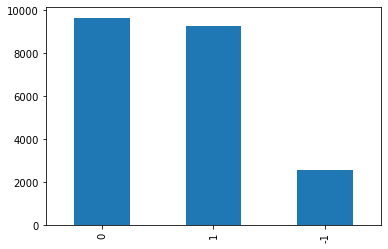

In [121]:
train_data['label'].value_counts().plot(kind='bar')

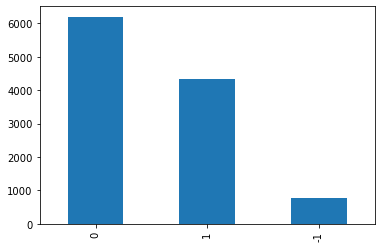

In [122]:
sktel_title_label['label'].value_counts().plot(kind='bar')

In [123]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(sktel_title_label.groupby('label').size().reset_index(name='count'))

   label  count
0     -1   2540
1      0   9652
2      1   9288
   label  count
0     -1    763
1      0   6201
2      1   4323


## 모델 만들기 위한 전처리 작업

In [124]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [155]:
# !pip install konlpy

## 토큰화 : 의미있는 단어로 나눠준다.

In [154]:
import konlpy
from konlpy.tag import Okt

#테스트용 사전
for_dic_test=pd.read_csv('./title_for_sentiment/dic_train_dataset.csv')
train_data=for_dic_test

okt = Okt()
X_train = []
for sentence in train_data['Title']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

X_test = []
for sentence in test_data['Title']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)


In [156]:
X_train

[['與', '영남', '주자', '“', '신종', '코로나', '추경', '검토', '”'],
 ['전기차', '-', '충전기', '제', '조사', '함께', "'", '상호', '운용', '성', '테스', '티벌', "'"],
 ['"',
  '정부',
  ',',
  '저',
  '공해',
  '차',
  '안',
  '만들다',
  '대기업',
  '패널',
  '티',
  '강화',
  '추진',
  '"'],
 ["'",
  '시스템',
  '반도체',
  '팹리스',
  "'",
  '후속',
  '조치',
  '본격',
  '화',
  '…',
  '현장',
  '소통',
  '행보',
  '시작'],
 ['외국인', ',', '보름', '간', '韓', '주식', '2.4', '兆', '매수', '…', '반도체', '절반'],
 ['與',
  '"',
  '한국',
  '당',
  "'",
  '박영선',
  '흠집',
  '내기',
  "'",
  '넘다',
  '…',
  '강력',
  '대응',
  '"'],
 ['한국',
  '당',
  '산',
  '자위',
  '“',
  '박영선',
  '남편',
  ',',
  '현대',
  '·',
  '기아차',
  '막대',
  '수임료',
  '추정',
  '”'],
 ["'",
  '텔루',
  '라이드',
  "'",
  '생산',
  '공장',
  '찾다',
  '韓',
  '·',
  '美',
  '대사',
  '"',
  '기아차',
  ',',
  '현지',
  '경제',
  '살리다',
  '"'],
 ['[', '포토', ']', '김현종', '본부장', ',', '美', '상원의원', "'", '車', '232조', "'", '면담'],
 ['하태경', '“', '한국', 'GM', '노조', ',', '또', '파업', '…', '명백하다', '자살', '행위', '”'],
 ['조선업',
  '이다',
  '車',
  '부품',
  '기업',
  '3.5조원',

In [157]:
X_test[:1]

[['국내',
  '넷플릭스',
  '이용',
  '률',
  ',',
  '전',
  '년',
  '比',
  '5%',
  'p',
  '↑',
  '…',
  '유료',
  'OTT',
  '강세']]

## 토큰화한 단어. 컴퓨터 인식 가능하도록 정수 인코딩

In [158]:
from keras.preprocessing.text import Tokenizer
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

In [159]:
X_test[:3]

[[129, 7968, 1822, 411, 1, 37, 83, 105, 617, 894, 36, 3, 8331, 119],
 [2822, 4151, 248, 130, 253, 294, 1138, 7, 5348],
 [537,
  485,
  1,
  5081,
  7,
  744,
  100,
  10735,
  245,
  137,
  430,
  10310,
  3,
  32,
  2147,
  790,
  4316,
  2683,
  37,
  1276]]

In [160]:
X_train[:3]

[[3761, 8286, 6138, 214, 1640, 151, 3762, 781, 224],
 [167, 88, 2674, 170, 672, 692, 2, 4278, 2076, 108, 585, 5049, 2],
 [5, 324, 1, 278, 6139, 42, 306, 756, 225, 6140, 1048, 177, 507, 5]]

## one-hot encoding

In [161]:
import numpy as np
y_train = []
y_test = []
for i in range(len(train_data['label'])):
    if train_data['label'].iloc[i] == 1:
        y_train.append([0, 0, 1]) 
    elif train_data['label'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == -1:
        y_train.append([1, 0, 0]) 
        
for i in range(len(test_data['label'])):
    if test_data['label'].iloc[i] == 1:
        y_test.append([0, 0, 1]) 
    elif test_data['label'].iloc[i] == 0:
        y_test.append([0, 1, 0]) 
    elif test_data['label'].iloc[i] == -1:
        y_test.append([1, 0, 0]) 
        
y_train=np.array(y_train)
y_test=np.array(y_test)

In [162]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [163]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

## 모델만들기 & 학습

In [164]:
## train 데이터 이용해서 모델 만드는거야. 거기에 나중에 테스트 데이터 넣어서 확인 할거다!

In [165]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

max_len = 20 # pad_sequesces이용, 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [166]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
1934/1934 [==============================] - 41s 21ms/step - loss: 0.2891 - accuracy: 0.8949 - val_loss: 0.1012 - val_accuracy: 0.9725
Epoch 2/10
1934/1934 [==============================] - 45s 23ms/step - loss: 0.0791 - accuracy: 0.9800 - val_loss: 0.0735 - val_accuracy: 0.9800
Epoch 3/10
1934/1934 [==============================] - 47s 24ms/step - loss: 0.0488 - accuracy: 0.9888 - val_loss: 0.0733 - val_accuracy: 0.9870
Epoch 4/10
1934/1934 [==============================] - 48s 25ms/step - loss: 0.0400 - accuracy: 0.9911 - val_loss: 0.0781 - val_accuracy: 0.9874
Epoch 5/10
1934/1934 [==============================] - 51s 26ms/step - loss: 0.0331 - accuracy: 0.9930 - val_loss: 0.0846 - val_accuracy: 0.9856
Epoch 6/10
1934/1934 [==============================] - 50s 26ms/step - loss: 0.0297 - accuracy: 0.9942 - val_loss: 0.0834 - val_accuracy: 0.9823
Epoch 7/10
1934/1934 [==============================] - 51s 26ms/step - loss: 0.0248 - accuracy: 0.9948 - val_loss: 0.0931 -

## Optimizer 아담으로 바꾼 애!

In [167]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
1934/1934 [==============================] - 88s 46ms/step - loss: 0.2155 - accuracy: 0.9200 - val_loss: 0.0721 - val_accuracy: 0.9823
Epoch 2/10
1934/1934 [==============================] - 82s 43ms/step - loss: 0.0310 - accuracy: 0.9915 - val_loss: 0.0496 - val_accuracy: 0.9865
Epoch 3/10
1934/1934 [==============================] - 84s 43ms/step - loss: 0.0116 - accuracy: 0.9967 - val_loss: 0.0572 - val_accuracy: 0.9884
Epoch 4/10
1934/1934 [==============================] - 83s 43ms/step - loss: 0.0085 - accuracy: 0.9976 - val_loss: 0.0625 - val_accuracy: 0.9870
Epoch 5/10
1934/1934 [==============================] - 84s 43ms/step - loss: 0.0031 - accuracy: 0.9988 - val_loss: 0.0743 - val_accuracy: 0.9874
Epoch 6/10
1934/1934 [==============================] - 81s 42ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0672 - val_accuracy: 0.9893
Epoch 7/10
1934/1934 [==============================] - 84s 43ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0738 -

## 모델 평가

In [169]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test)[1]*100))

353/353 [==============================] - 1s 3ms/step - loss: 0.3699 - accuracy: 0.9429

 테스트 정확도 : 94.29%


In [170]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test,y_test)[1]*100))

353/353 [==============================] - 1s 4ms/step - loss: 0.2390 - accuracy: 0.9650

 테스트 정확도 : 96.50%


In [39]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 18s 33ms/step - loss: 0.3645 - accuracy: 0.8687 - val_loss: 0.1752 - val_accuracy: 0.9617
Epoch 2/10
540/540 [==============================] - 18s 32ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.1488 - val_accuracy: 0.9683
Epoch 3/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.1964 - val_accuracy: 0.9550
Epoch 4/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.2194 - val_accuracy: 0.9717
Epoch 5/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.2083 - val_accuracy: 0.9583
Epoch 6/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.2155 - val_accuracy: 0.9650
Epoch 7/10
540/540 [==============================] - 17s 32ms/step - loss: 8.1597e-04 - accuracy: 0.9996 - val_loss: 0.2350 - val_accur

In [70]:
predict = model.predict(X_test)

In [71]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [72]:
label = ['부정', '중립','긍정']
for i in range(30):
    print("기사제목 : ", test_data_db['title'].iloc[i], "/\t 원래 라벨 : ", label[original_labels[i]], "/\t예측한 라벨 : ", label[predict_labels[i]])

기사제목 :  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  기로에 선 자영업자 그래도 해법은 있다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래 라벨 :  부정 /	예측한 라벨 :  중립
기사제목 :  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래 라벨 :  중립 /	예측한 라벨 :  긍정
기사제목 :  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래 라벨 :  긍정 /	예측

In [74]:
label = ['부정', '중립','긍정']
for i in range(30):
    print("기사제목 : ", test_data_db['Title'].iloc[i],  "/\t예측한 라벨 : ", label[predict_labels[i]])

기사제목 :  DB손해보험, 브랜드 사용료 623억 지출 /	예측한 라벨 :  중립
기사제목 :  금융권도 코로나 초비상…3단계 대응 잰걸음(종합) /	예측한 라벨 :  중립
기사제목 :  사회적 거리두기 2단계 연장에…'구인 절벽' 보험사 안도(종합) /	예측한 라벨 :  중립
기사제목 :  코로나 악화땐 시중은행 본점 절반만 출근 /	예측한 라벨 :  중립
기사제목 :  "공채도 못 뽑아…" 코로나 재확산에 보험업계 '구인 절벽' /	예측한 라벨 :  중립
기사제목 :  '개통령'도 물렸다…개물림 사고 최근 5년 간 1만건 넘어(종합) /	예측한 라벨 :  중립
기사제목 :  '개통령'도 물렸다…개물림 사고 평균 진료비 200만원 달해 /	예측한 라벨 :  중립
기사제목 :  DB손보, 주소만 알면 승강기사고배상책임보험 가입 /	예측한 라벨 :  중립
기사제목 :  보험사 오너 2,3세…경영권 승계 준비 '잰걸음'(종합) /	예측한 라벨 :  중립
기사제목 :  보험사 오너 2,3세…경영권 승계 준비 '잰걸음' /	예측한 라벨 :  중립
기사제목 :  대형 생·손보사, '코로나' 악재에도 장사 잘했다(종합) /	예측한 라벨 :  중립
기사제목 :  대형 생·손보사, 코로나19에도 장사 잘했다 /	예측한 라벨 :  중립
기사제목 :  보험사, 2분기 깜짝 실적…"코로나로 손해율 개선" /	예측한 라벨 :  중립
기사제목 :  상반기 금융권 연봉 1위는…정태영 현대카드 부회장 26억원 /	예측한 라벨 :  긍정
기사제목 :  DB손보, 상반기 순익 3494억…전년비 69.4%↑ /	예측한 라벨 :  중립
기사제목 :  [인사]DB손해보험 /	예측한 라벨 :  중립
기사제목 :  반려동물 전용CCTV는? 유플러스펫케어 ‘맘카’로 알려져 /	예측한 라벨 :  중립
기사제목 :  [기자수첩]빅테크, 보험까지 진출…소비자는 환영할까 /	예측한 라벨 :  긍정
기사제목 :  전국 기록적 폭우에 '풍수해보험' 등 피해 접수 잇따라 /	예측한 라벨 :  부정
기사제목 : 